In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from dynadojo.systems.fbsnn_pde import BSBSystem, HJBSystem
from dynadojo.wrappers import SystemChecker
from dynadojo.utils.fbsnn_pde import plot

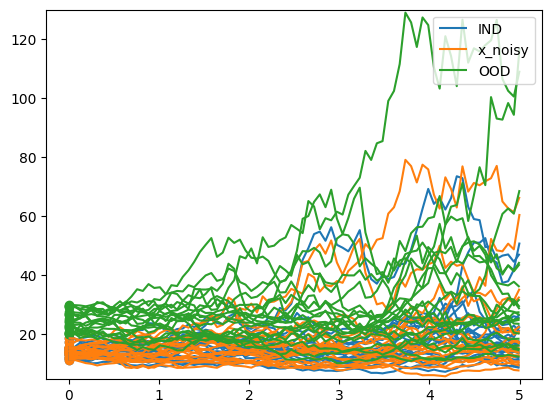

In [106]:
# Black-Scholes-Barenblatt PDE, often used for simulating finacial data and assets management
latent_dim = [40]
embed_dim = 1
n = 20
timesteps = 80
for dim in latent_dim:
    system = SystemChecker(BSBSystem(dim, embed_dim, T=5.0))

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, noisy=True, control=None)
    y = system.make_data(y0, timesteps=timesteps, control=None)

plot([x, x_noisy, y], timesteps=timesteps, T=5.0, target_dim=1, max_lines=100, labels=["IND", "x_noisy", "OOD"])

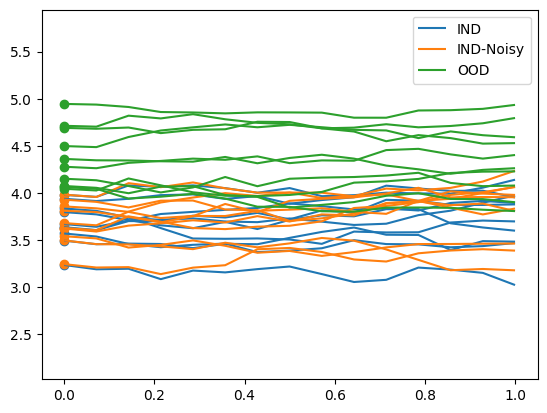

In [103]:
# Hamilton-Jacobi-Bellman PDE, often used for optimal control
latent_dim = [20]
embed_dim = 1
n = 10
timesteps = 15
for dim in latent_dim:
    system = SystemChecker(HJBSystem(dim, embed_dim))

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, noisy=True, control=None)
    y = system.make_data(y0, timesteps=timesteps, control=None)

plot([x, x_noisy, y], timesteps=timesteps, target_dim=1, max_lines=100, labels=["IND", "IND-Noisy", "OOD"])